# Lista 1
## Visão Computacional

Alunos: Hugo Gabriel de Melo Santos
        Larissa Duarte Santana

1. Implemente uma funcao que receba uma imagem em formato PPM,
o tamanho n de um filtro espacial com dimens ̃oes n × n e a matriz com os
pesos do filtro, e aplique o filtro com uma convolu ̧c ̃ao, gerando e salvando a
imagem resultante no disco em formato PPM. Vocˆe n ̃ao pode usar a OpenCV

em nenhum desses passos. As especifica ̧c ̃oes do formato PPM podem ser en-
contradas aqui: https://netpbm.sourceforge.net/doc/ppm.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image




In [149]:
def aplicar_filtro_ppm(imagem_ppm, tamanho_filtro, pesos_filtro, output_filename='default.ppm', show=True):
    
    if tamanho_filtro % 2 == 0:
        tamanho_filtro+=1
    # Abrir imagem PPM
    with open(imagem_ppm, 'rb') as imagem:
        # Ler cabeçalho da imagem PPM
        cabecalho = imagem.readline()
        # Ler dimensões da imagem PPM
        dimensoes = imagem.readline().decode().split()
        largura = int(dimensoes[0])
        altura = int(dimensoes[1])
        # Ler valor máximo da cor
        valor_maximo = int(imagem.readline())

        # Ler dados da imagem PPM
        imagem_data = np.fromfile(imagem, dtype=np.uint8).reshape((altura, largura, 3))

    # Converter pesos do filtro em um array numpy
    pesos_filtro = np.array(pesos_filtro)

    # Calcular tamanho do padding
    padding = tamanho_filtro // 2

    # Adicionar padding na imagem
    imagem_data_padded = np.pad(imagem_data, ((padding, padding), (padding, padding), (0, 0)), mode='edge')

    
    # Criar imagem resultante
    imagem_resultante = np.zeros_like(imagem_data)

    # Aplicar filtro
    for i in range(padding, altura + padding):
        for j in range(padding, largura + padding):
            # Selecionar região da imagem correspondente ao tamanho do filtro
            regiao = imagem_data_padded[i - padding:i + padding + 1, j - padding:j + padding + 1, :]


            # Realizar a convolução
            pixel_resultante = np.sum(regiao * pesos_filtro, axis=(0, 1))

            # Armazenar pixel resultante na imagem resultante
            imagem_resultante[i - padding, j - padding, :] = pixel_resultante

    # Salvar imagem resultante em formato PPM
    with open(output_filename, 'wb') as imagem_resultante_ppm:
        # Escrever cabeçalho da imagem PPM
        imagem_resultante_ppm.write(cabecalho)
        imagem_resultante_ppm.write('{} {}\n'.format(largura, altura).encode())
        imagem_resultante_ppm.write('{}\n'.format(valor_maximo).encode())

        # Escrever dados da imagem PPM
        imagem_resultante.tofile(imagem_resultante_ppm)
    
    if show:
        image_input = plt.imread(imagem_ppm)
        image_output = plt.imread(output_filename)

        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        plt.imshow(image_input)
        plt.subplot(1,2,2)
        plt.imshow(image_output)
        plt.show()

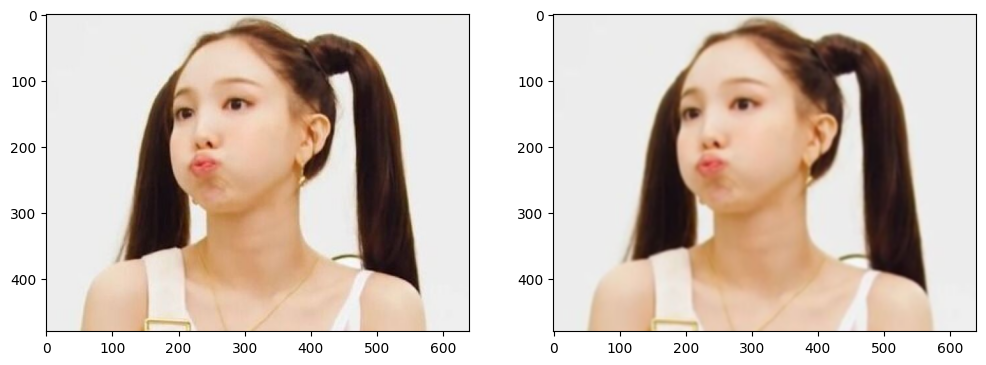

In [40]:
image_path = 'nayeon.ppm'
filter_size = 5
filter_weights =  [
    [0.04, 0.04, 0.04],
    [0.04, 0.04,0.04],
    [0.04, 0.04, 0.04],
    [0.04, 0.04,0.04],
    [0.04, 0.04, 0.04],
]


aplicar_filtro_ppm(image_path, filter_size, filter_weights)

2. Usando a fun ̧c ̃ao da quest ̃ao 1, implemente dois tipos de filtro para
remo ̧c ̃ao de ru ́ıdos e aplique-os em trˆes imagens distintas.

In [153]:
def filtro_media(tamanho_filtro):
    if tamanho_filtro % 2 == 0:
        tamanho_filtro+=1
    # Criar matriz de pesos com valores iguais a 1
    pesos_filtro = np.ones((tamanho_filtro, tamanho_filtro, 3)) / (tamanho_filtro ** 2)
    return pesos_filtro

def filtro_mediana(tamanho):
    if tamanho % 2 == 0:
        tamanho+=1
    # Criar matriz de pesos com valor 1 para todos os elementos
    matriz_pesos = np.ones((tamanho, tamanho, 3))
    # Transformar matriz em uma lista unidimensional e ordenar em ordem crescente
    lista_pesos = sorted(matriz_pesos.flatten())
    # Selecionar o elemento mediano da lista de pesos
    peso_mediana = lista_pesos[len(lista_pesos) // 2]
    # Preencher a matriz de pesos com o valor mediano
    matriz_pesos.fill(peso_mediana)
    # Retornar a matriz de pesos
    return matriz_pesos/pow(tamanho,2)

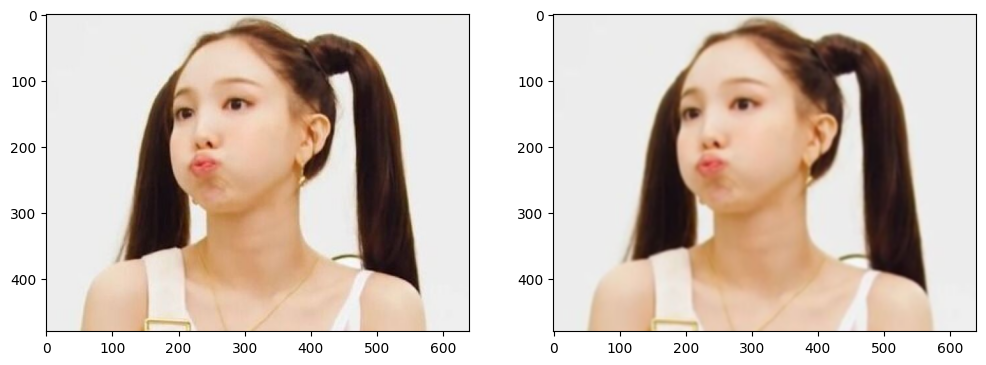

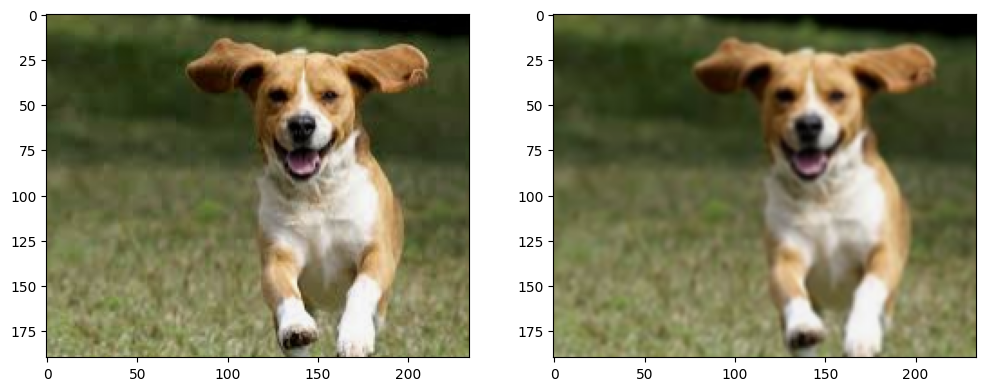

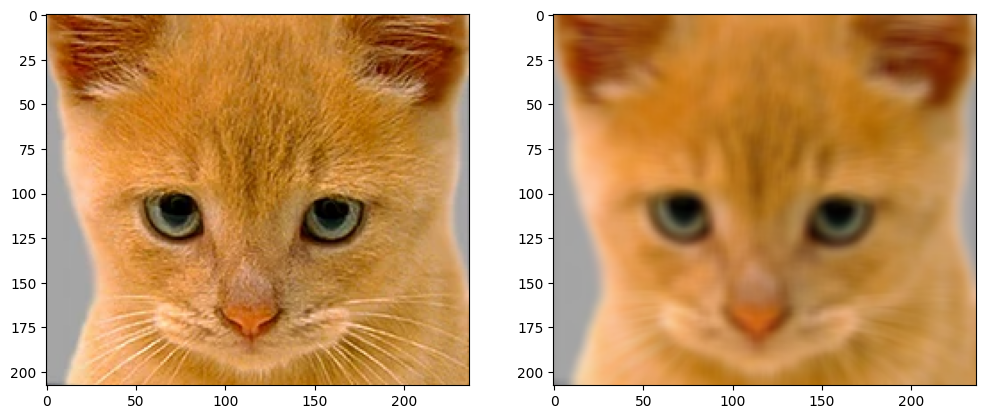

In [47]:
# Aplicar filtro de média em uma imagem
imagem_ppm1 = 'nayeon.ppm'
tamanho_filtro = 5
pesos_filtro = filtro_media(tamanho_filtro)
aplicar_filtro_ppm(imagem_ppm1, tamanho_filtro, pesos_filtro, output_filename='nayeon_out.ppm')

# Aplicar filtro de mediana em uma imagem
imagem_ppm2 = 'dog.ppm'
tamanho_filtro = 3
filtro_mediana_pixel = filtro_mediana(tamanho_filtro)
aplicar_filtro_ppm(imagem_ppm2, tamanho_filtro, filtro_mediana_pixel, output_filename='dog_out.ppm')

# Aplicar filtro de média em outra imagem
imagem_ppm3 = 'cat.ppm'
tamanho_filtro = 7
pesos_filtro = filtro_media(tamanho_filtro)
aplicar_filtro_ppm(imagem_ppm3, tamanho_filtro, pesos_filtro, output_filename='cat_out.ppm')



3. Usando a fun ̧c ̃ao da quest ̃ao 1, pesquise um filtro passa-alta e
aplique-o em 3 imagens distintas, variando o valor de n em 3 unidades em
cada imagem. O que acontece quando n cresce?

In [169]:
import cv2

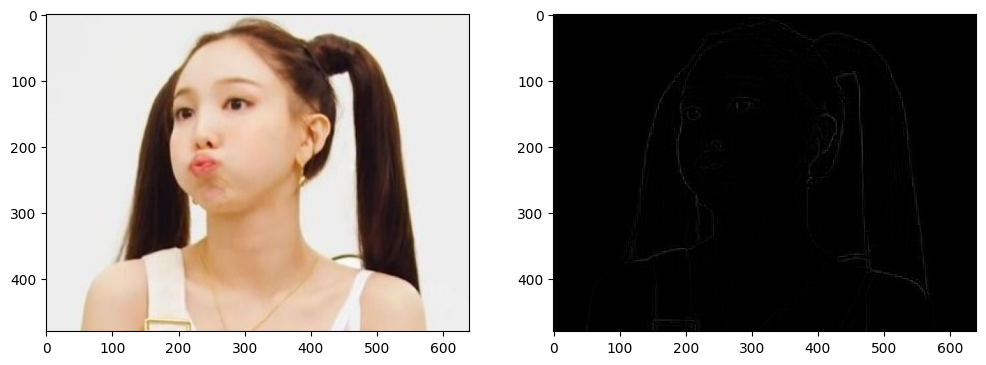

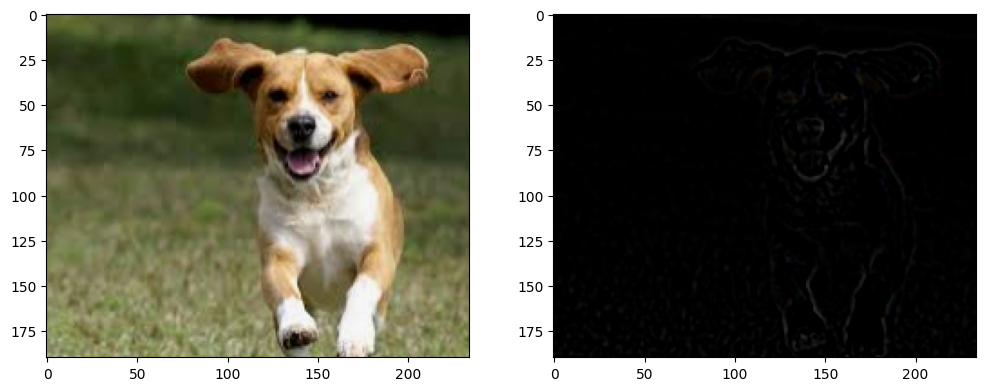

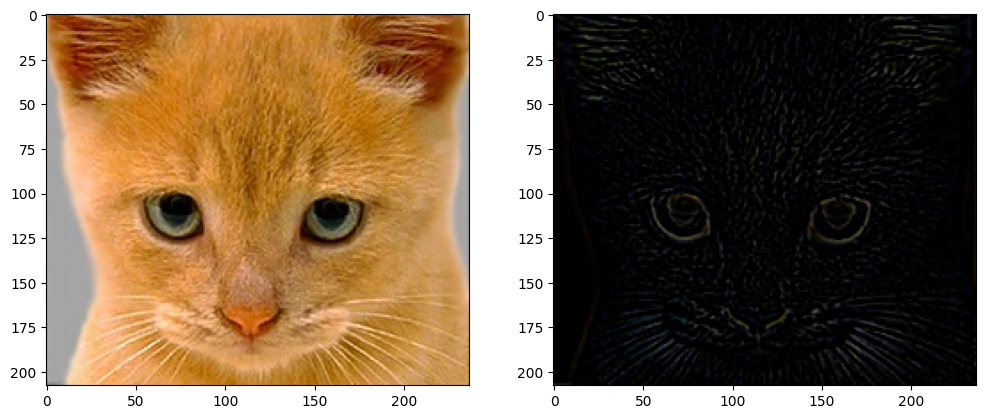

In [178]:
filtro_laplaciano_3 = np.array([
    [0, -1, 0], 
    [-1, 4, -1], 
    [0, -1, 0]])


filtro_laplaciano_6 = np.array([[ 0,  0,  1,  1,  1,  0,  0],
 [ 0,  1,  3,  3,  3,  1,  0],
 [ 1,  3,  0, -7,  0,  3,  1],
 [ 1,  3, -7,-24, -7,  3,  1],
 [ 1,  3,  0, -7,  0,  3,  1],
 [ 0,  1,  3,  3,  3,  1,  0],
 [ 0,  0,  1,  1,  1,  0,  0]])/pow(6,2)
# filtro_laplaciano_6 = np.repeat(filtro_laplaciano_6[:, :, np.newaxis], 3, axis=2)

filtro_laplaciano_9 = np.array([[ 0,  0,  1,  1,  1,  0,  0,  0,  0],
 [ 0,  1,  3,  3,  3,  1,  0,  0,  0],
 [ 1,  3,  0, -7,  0,  3,  1,  0,  0],
 [ 1,  3, -7,-24, -7,  3,  1,  0,  0],
 [ 1,  3,  0, -7,  0,  3,  1,  0,  0],
 [ 0,  1,  3,  3,  3,  1,  0,  0,  0],
 [ 0,  0,  1,  1,  1,  0,  0,  0,  0],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])/pow(9,2)

# filtro_laplaciano_9 = np.repeat(filtro_laplaciano_9[:, :, np.newaxis], 3, axis=2)

imagem_ppm1 = 'nayeon.ppm'
image_1 = plt.imread(imagem_ppm1)
imagem_filtrada_1 = cv2.filter2D(image_1, -1, filtro_laplaciano_3)

imagem_ppm3 = 'cat.ppm'
image_3 = plt.imread(imagem_ppm3)
imagem_filtrada_2 = cv2.filter2D(image_3, -1, filtro_laplaciano_6)


# Aplicar filtro de mediana em uma imagem
imagem_ppm2 = 'dog.ppm'
image_2 = plt.imread(imagem_ppm2)
imagem_filtrada_3 = cv2.filter2D(image_2, -1, filtro_laplaciano_9)
# Aplicar filtro de média em outra imagem

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image_1)
plt.subplot(1,2,2)
plt.imshow(imagem_filtrada_1)
plt.show()
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(image_2)
plt.subplot(1,2,2)
plt.imshow(imagem_filtrada_3)
plt.show()
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(image_3)
plt.subplot(1,2,2)
plt.imshow(imagem_filtrada_2)
plt.show()

Quanto maior o valor de N, mais bordas são detectadas

4. Usando a fun ̧c ̃ao da quest ̃ao 1, pesquise um filtro passa-baixa e
aplique-o em 3 imagens distintas, variando o valor de n em 3 unidades em
cada imagem. O que acontece quando n cresce?

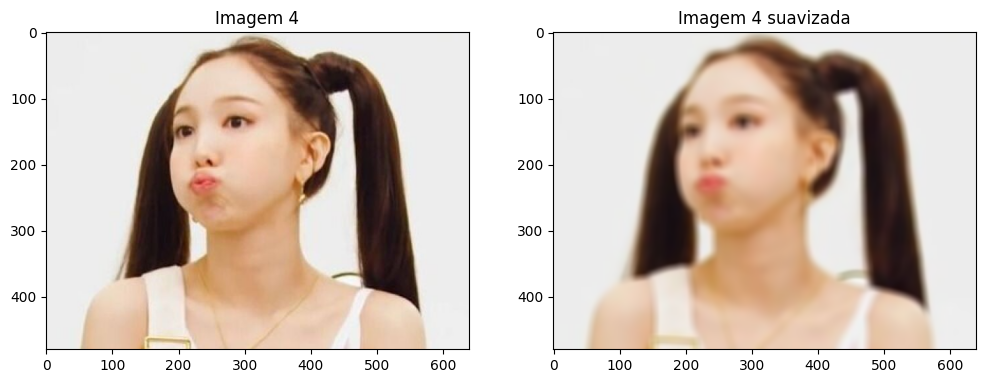

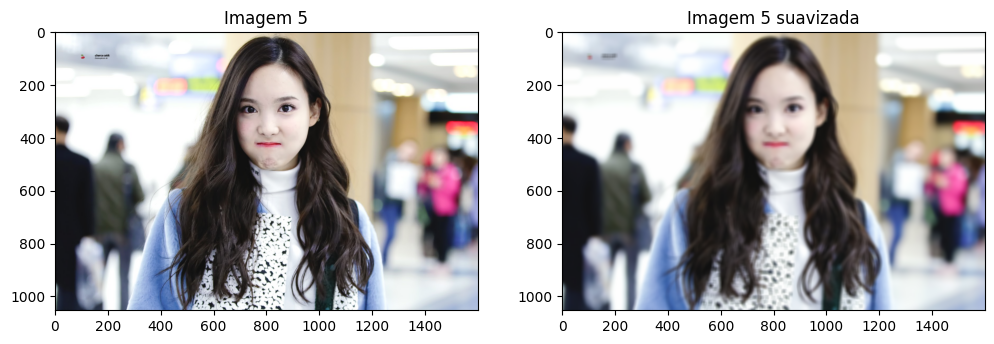

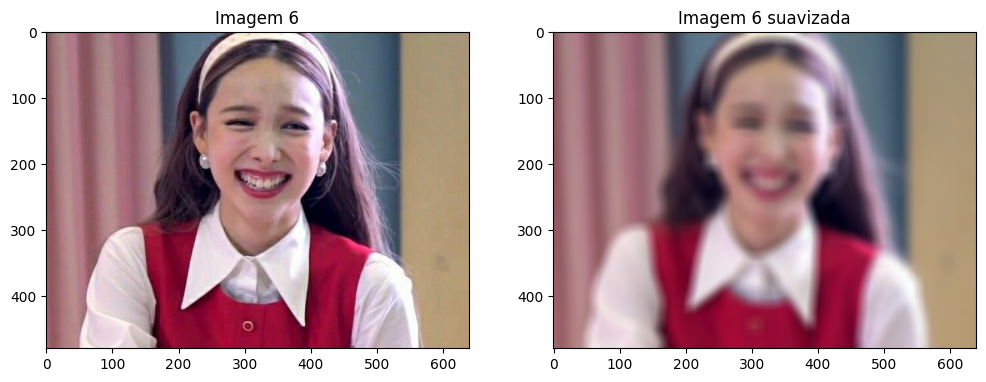

In [142]:

# filtro_passa_baixa = np.ones((3, 3)) / 9.0

for i in range(3, 6):
    # Carregar imagem
    imagem_path = f'nayeon{i-2}.ppm'
    
    # Aplicar filtro
    n = 3 + i*3
    if n%2==0:
        n+=1
#     print(n)
    filtro_passa_baixa = np.ones((n, n, 3)) / (n ** 2)

    imagem_suavizada = aplicar_filtro_ppm(imagem_path, n, filtro_passa_baixa, f'imagem{i}_suavizada.ppm', show=False)
    
    # Plotar imagens original e suavizada
    imagem_original = plt.imread(imagem_path)
    imagem_suavizada = plt.imread(f'imagem{i}_suavizada.ppm')
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(imagem_original)
    plt.title(f'Imagem {i+1}')
    plt.subplot(1,2,2)
    plt.imshow(imagem_suavizada)
    plt.title(f'Imagem {i+1} suavizada')
    plt.show()

5. Aplique o detector de canny usando a fun ̧c ̃ao Canny() da OpenCV
em uma ou mais imagens de sua escolha. Experimente variar os parˆametros
threshold1, threshold2 e apertureSize. Explique com suas palavras a influˆencia
de cada parˆametro no resultado.

In [7]:
!pip install opencv-python

You should consider upgrading via the 'c:\users\hugom\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [8]:
import cv2

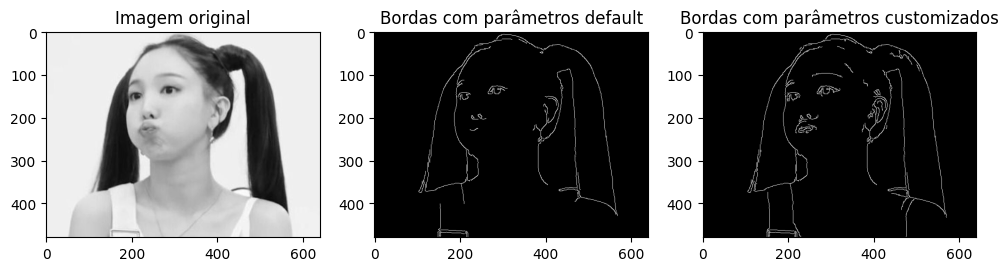

In [70]:
# Carregar imagem em escala de cinza
img = cv2.imread('nayeon.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar Canny com parâmetros default
edges1 = cv2.Canny(img, 100, 200)

# Aplicar Canny com parâmetros customizados
edges2 = cv2.Canny(img, 50, 150, apertureSize=3)

# Plotar imagens
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagem original')

plt.subplot(1, 3, 2)
plt.imshow(edges1, cmap='gray')
plt.title('Bordas com parâmetros default')

plt.subplot(1, 3, 3)
plt.imshow(edges2, cmap='gray')
plt.title('Bordas com parâmetros customizados')


plt.show()

Os parâmetros threshold1 e threshold2 são usados para controlar a sensibilidade do algoritmo na detecção de bordas. Eles definem os limiares mínimo e máximo para os gradientes das bordas. Valores mais altos para esses parâmetros resultam em menos bordas detectadas, enquanto valores mais baixos resultam em mais bordas detectadas.

O parâmetro apertureSize é o tamanho do filtro de Sobel usado na detecção de bordas. 
O filtro Sobel é usado para calcular a magnitude do gradiente na imagem, que é usada para detectar bordas. 
Um filtro maior pode capturar melhor as características de bordas maiores, mas pode perder detalhes das bordas menores. 





6. Implemente uma fun ̧c ̃ao que aumente a resolu ̧c ̃ao da imagem por
um fator s, onde s  ́e um inteiro maior que 1, usando a abordagem de vizinho

mais pr ́oximo. Vocˆe s ́o pode usar o OpenCV para carregar a imagem. Apli-
que sua fun ̧c ̃ao em uma imagem, com 3 valores de s distintos.

In [10]:
def aumentar_resolucao(img, s):
    altura, largura = img.shape[:2]
    nova_altura, nova_largura = s * altura, s * largura
    nova_img = np.zeros((nova_altura, nova_largura, 3), dtype=np.uint8)
    for i in range(nova_altura):
        for j in range(nova_largura):
            i_original = i // s
            j_original = j // s
            nova_img[i, j, :] = img[i_original, j_original, :]
    return nova_img

In [11]:
# Carregar imagem usando o OpenCV
img = cv2.imread('nayeon.jpg')

# Aumentar a resolução da imagem por um fator de 2, 3 e 4
nova_img1 = aumentar_resolucao(img, 2)
nova_img2 = aumentar_resolucao(img, 3)
nova_img3 = aumentar_resolucao(img, 4)

# Mostrar imagens resultantes

# Plotar imagens
# plt.figure(figsize=(12,6))
# plt.subplot(1, 4, 1)
# plt.imshow(img, cmap='gray')
# plt.title('Imagem original')

# plt.subplot(1, 4, 2)
# plt.imshow(nova_img1, cmap='gray')
# plt.title('Nova imagem (fator 2)')

# plt.subplot(1, 4, 3)
# plt.imshow(nova_img2, cmap='gray')
# plt.title('Nova imagem (fator 3)')

# plt.subplot(1, 4, 4)
# plt.imshow(nova_img3, cmap='gray')
# plt.title('Nova imagem (fator 4)')

# plt.show()

# Mostrar imagens resultantes
cv2.imshow('Imagem original', img)
cv2.imshow('Nova imagem (fator 2)', nova_img1)
cv2.imshow('Nova imagem (fator 3)', nova_img2)
cv2.imshow('Nova imagem (fator 4)', nova_img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

7. Escolha uma imagem interessante e gere uma pirˆamide aplicando
sucessivamente downsampling 3 vezes com fator 1/2. Fa ̧ca o mesmo com
uma pirˆamide gaussiana e compare os resultados. Mostre os resultados de
cada pirˆamide em uma  ́unica imagem lado a lado, como no slides 20 (vai
exigir algumas opera ̧c ̃oes de transla ̧c ̃ao de imagens). Obs.: aqui vocˆe pode
usar fun ̧c ̃oes do OpenCV.

In [221]:
def reshapeImage(image,factor):
    h = image.shape[0]
    w = image.shape[1]
    
    h *= factor
    w *= factor
    
    result = cv2.resize(image,(int(w),int(h)))
    return result



In [222]:
from PIL import Image

In [237]:
# gerando as versões reduzidas
image = cv2.imread('./nayeon.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)/255

image2 = reshapeImage(image,1/2)
image3 = reshapeImage(image2,1/2)
image4 = reshapeImage(image3,1/2)

# gerando a pirâmide gaussiana

g_image2 = cv2.GaussianBlur(image,(3,3),3)
g_image2 = reshapeImage(g_image2,1/2)

g_image3 = cv2.GaussianBlur(g_image2,(3,3),3)
g_image3 = reshapeImage(g_image3,1/2)

g_image4 = cv2.GaussianBlur(g_image3,(3,3),3)
g_image4 = reshapeImage(g_image4,1/2)

plt.imsave('./nayeon1.png',image,cmap='gray')
plt.imsave('./nayeon2.png',image2,cmap='gray')
plt.imsave('./nayeon3.png',image3,cmap='gray')
plt.imsave('./nayeon4.png',image4,cmap='gray')
plt.imsave('./g_nayeon2.png',g_image2,cmap='gray')
plt.imsave('./g_nayeon3.png',g_image3,cmap='gray')
plt.imsave('./g_nayeon4.png',g_image4,cmap='gray')

In [238]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [239]:
def get_concat_h_blank(im1, im2, color=(0, 0, 0)):
    dst = Image.new('RGB', (im1.width + im2.width, max(im1.height, im2.height)), color)
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [240]:
def get_concat_h_multi_blank(im_list):
    _im = im_list.pop(0)
    for im in im_list:
        _im = get_concat_h_blank(_im, im)
    return _im

In [241]:
image1 = Image.open('./nayeon1.png')
image2 = Image.open('./nayeon2.png')
image3 = Image.open('./nayeon3.png')
image4 = Image.open('./nayeon4.png')
g_image2 = Image.open('./g_nayeon2.png')
g_image3 = Image.open('./g_nayeon3.png')
g_image4 = Image.open('./g_nayeon4.png')

In [242]:
concat = get_concat_h_multi_blank([image1,image2,image3,image4])

### Resultado sem a pirâmide Gausiana

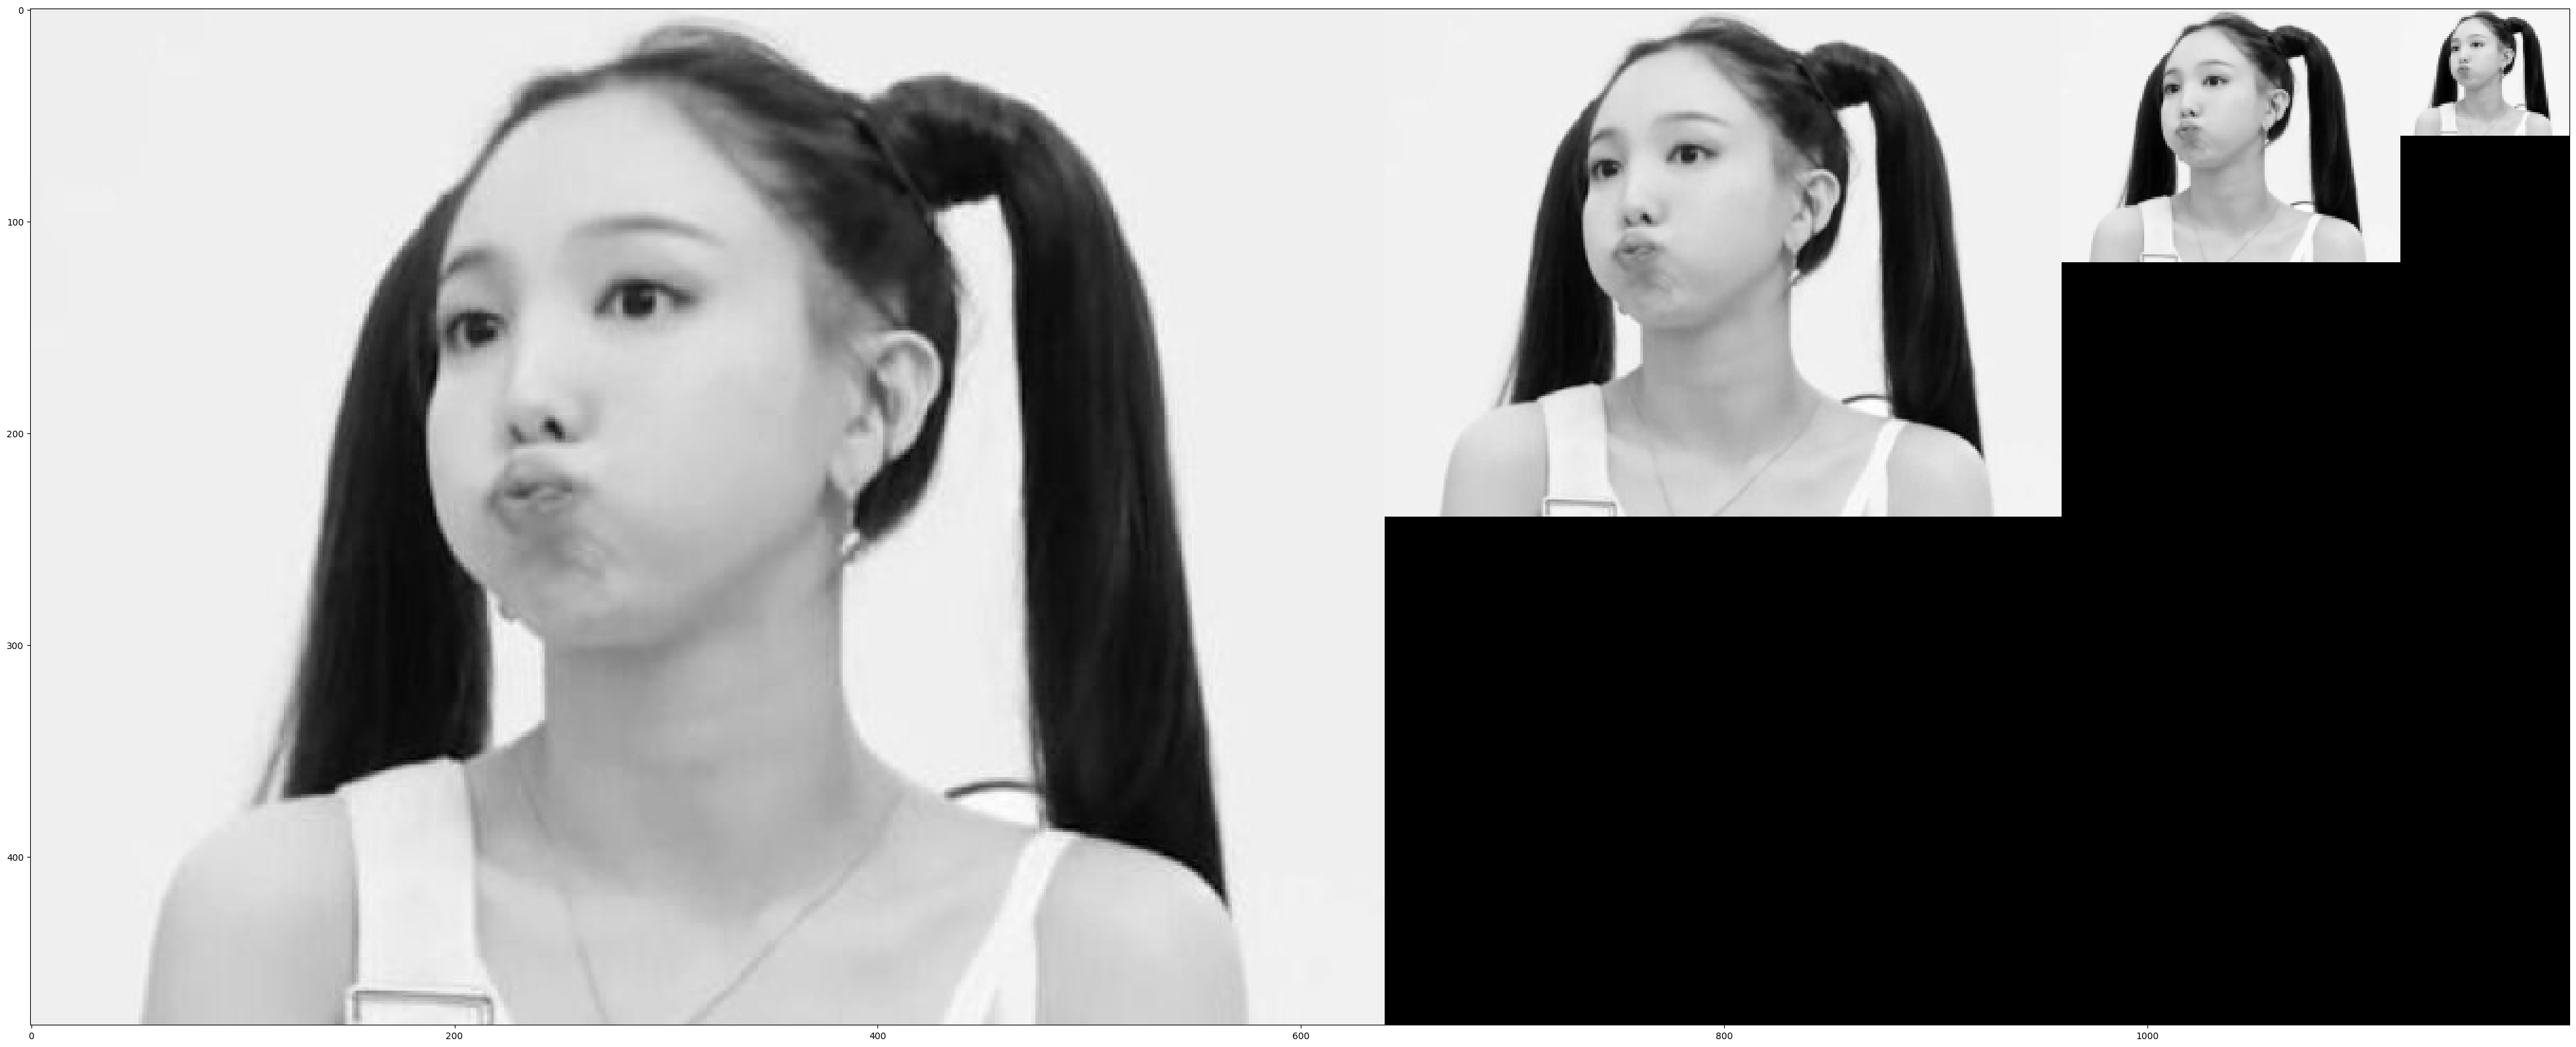

In [244]:
plt.figure(figsize=(50,50))
plt.imshow(concat,cmap='gray')

### Resultado com pirâmide Gausianna

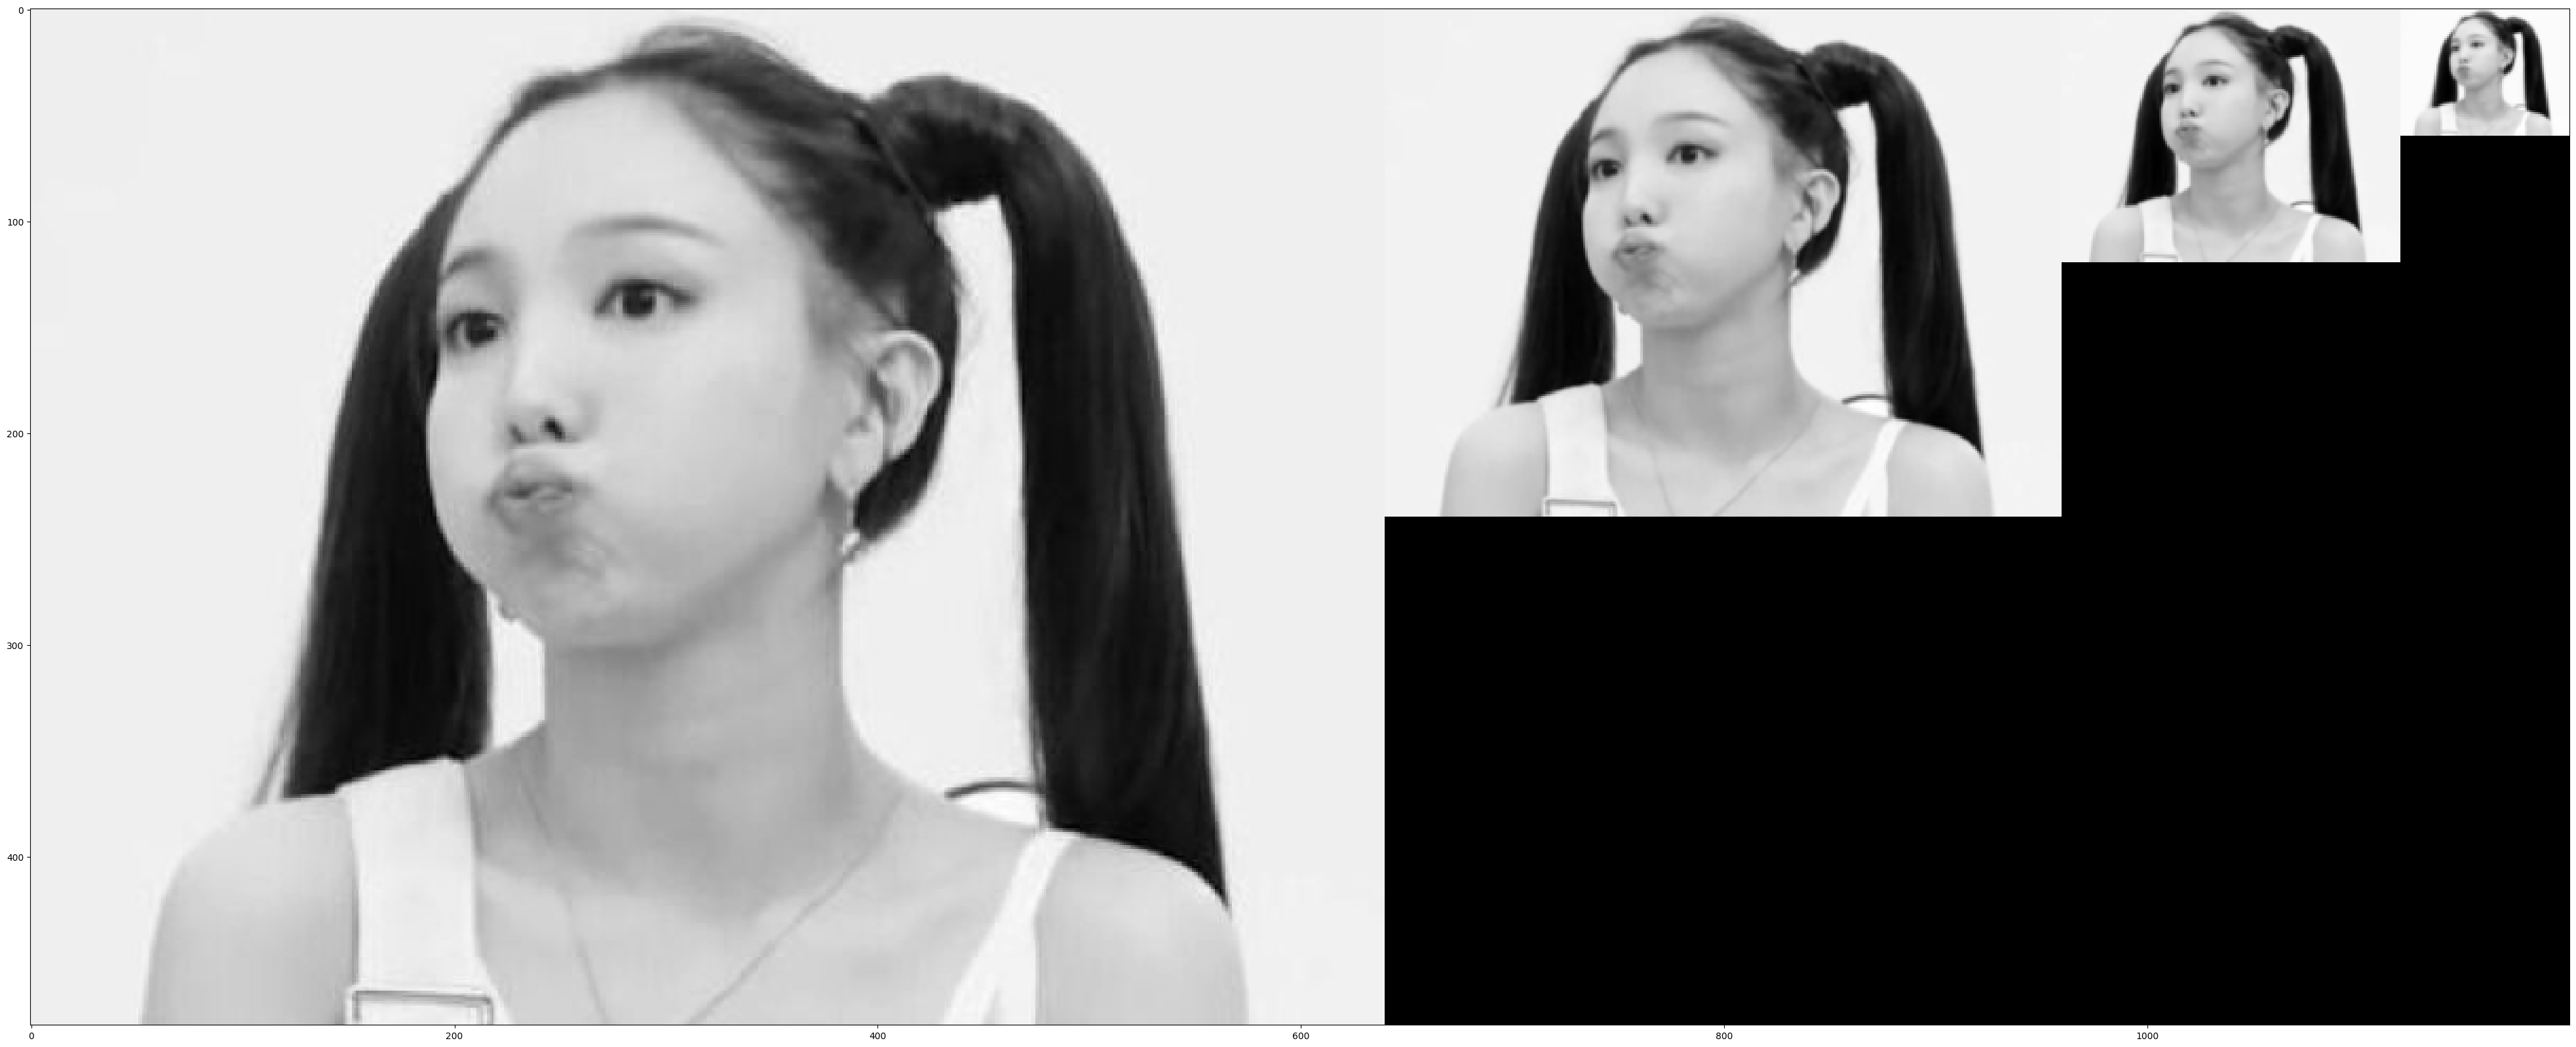

In [236]:
concat2 = get_concat_h_multi_blank([image1,g_image2,g_image3,g_image4])

plt.figure(figsize=(50,50))
plt.imshow(concat2,cmap='gray')

8. Usando a fun ̧c ̃ao da quest ̃ao 1, crie fun ̧c ̃oes que apliquem filtros
para calcular as imagens representando ∂f
∂x ,
∂f

∂y e |∇f|. Em seguida, imple-
mente o operador de Sobel usando estas imagens como entrada. Exiba cada

um desses resultados para trˆes imagens distintas.

In [195]:
!pip install sympy

You should consider upgrading via the 'c:\users\hugom\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [207]:
from sympy import *

In [208]:
def gaussDerivative(sigma, a, b, t):
    x, y = symbols('x y', real=True)
    f = (1/(2*np.pi*(sigma**2)))*exp(-(x**2 + y**2)/(2*sigma**2))
    if t == True:
        expr = diff(f, x)
    else:
        expr = diff(f, y)
    return expr.subs({x:a, y:b})

In [213]:
def gaussMatrix(n, img):

    if (n%2 == 0):
        print('O valor de n não é ímpar, por conta disso, n foi incrementado em uma unidade')
        n = n+1

    size = n
    half = int(size/2)
    
    sigma = 0.3*((size-1)*0.5 - 1) + 0.8
    gaussKernelDy = np.zeros((size, size))
    gaussKernelDx = np.zeros((size, size))
    for x in range(size):
        for y in range(size):
            gaussKernelDx[x][y] = gaussDerivative(sigma, (x-half), (y-half), t = True)#True para derivada em relação ao x e False para derivada em relação ao y
            gaussKernelDy[x][y] = gaussDerivative(sigma, (x-half), (y-half), t = False)

    gaussEdgex = cv2.filter2D(img, -1, gaussKernelDx)
    gaussEdgey = cv2.filter2D(img, -1, gaussKernelDy)

    norm = np.zeros((800,800))

    gaussMagnitude = np.hypot(gaussEdgex, gaussEdgey)
    gaussMagnitude = gaussMagnitude.astype(np.uint8)
    gaussMagnitude = cv2.normalize(gaussMagnitude,  norm, 0, 255, cv2.NORM_MINMAX)

    plot2Images(img, gaussMagnitude, 'Gauss Gradiente')

    plot2Images(img, gaussEdgex, 'Gauss df/dx')

    plot2Images(img, gaussEdgey, 'Gauss df/dy')

    return

In [218]:
def sobelMatrix(img):
    dx = np.matrix([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
    dy = np.matrix([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
    
    edgex = cv2.filter2D(img, -1, dx)
    edgey = cv2.filter2D(img, -1, dy)

    norm = np.zeros((800,800))

    magnitude = np.hypot(edgex, edgey)
    magnitude = magnitude.astype(np.uint8)
    magnitude = cv2.normalize(magnitude,  norm, 0, 255, cv2.NORM_MINMAX)

    plot2Images(img, magnitude, 'Sobel Gradiente')

    plot2Images(img, edgex, 'Sobel df/dx')

    plot2Images(img, edgey, 'Sobel df/dy')
    return

In [215]:
def plot2Images(img, dst, titulo):
    plt.subplots(figsize=(18, 11))
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title(str(titulo))
    plt.xticks([]), plt.yticks([])
    plt.show()

C:\Users\hugom\AppData\Local\Temp\ipykernel_7960\264974020.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')


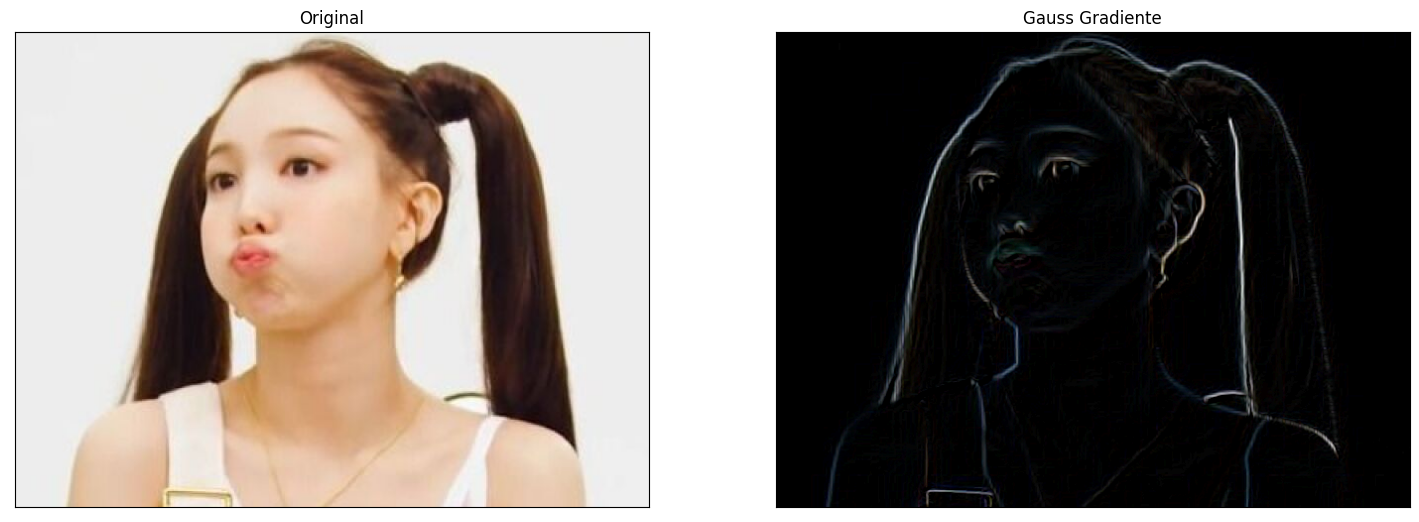

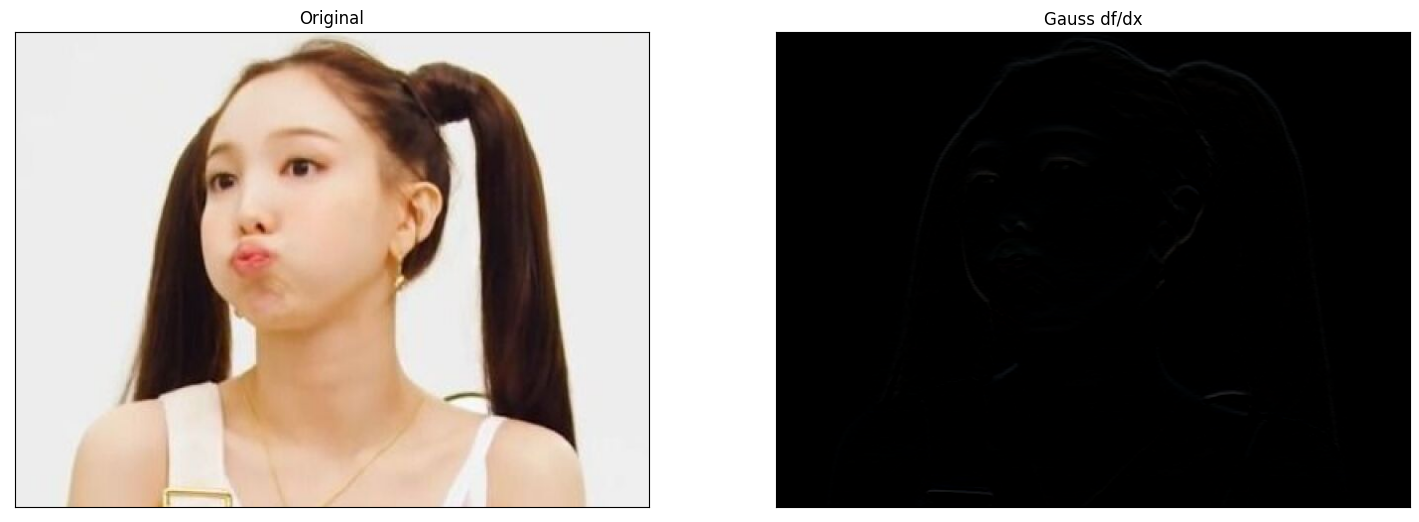

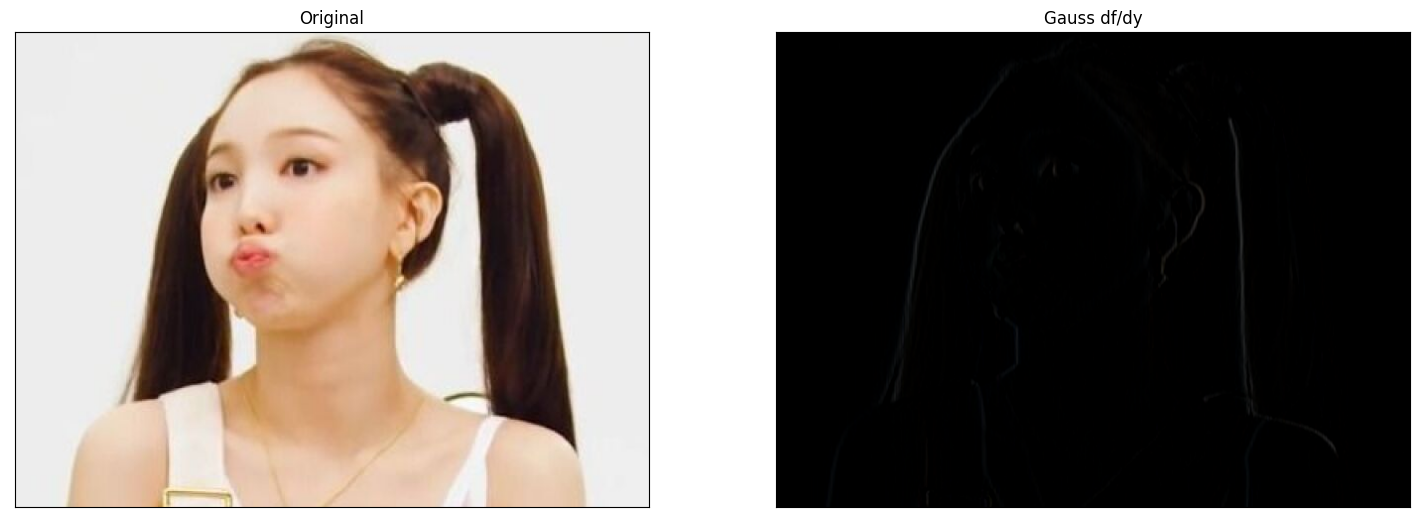

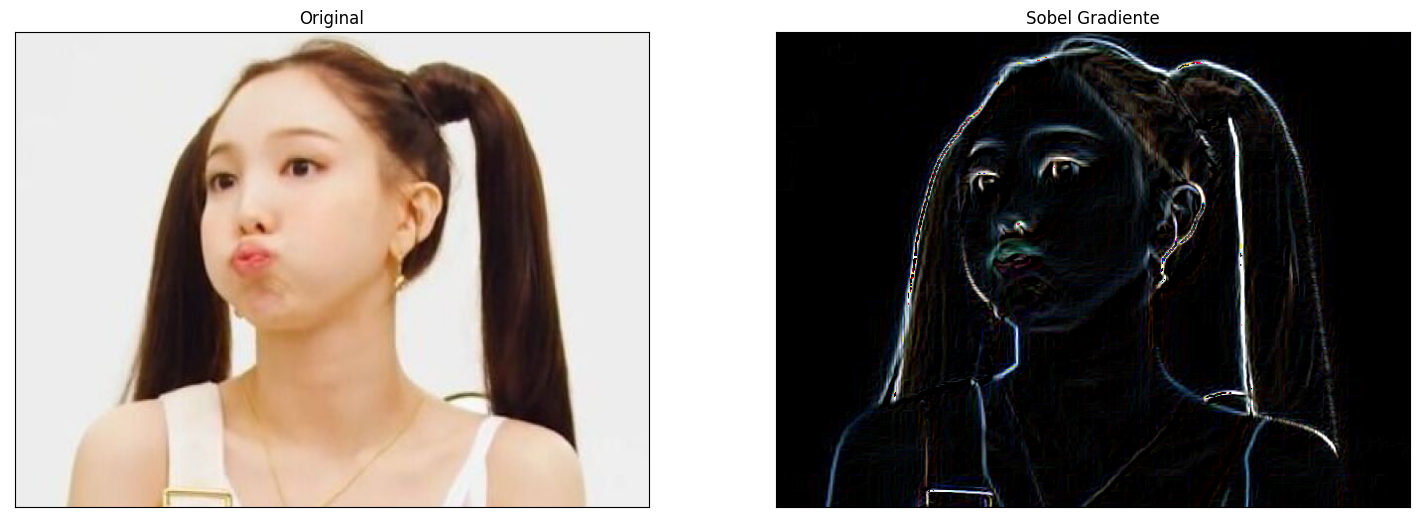

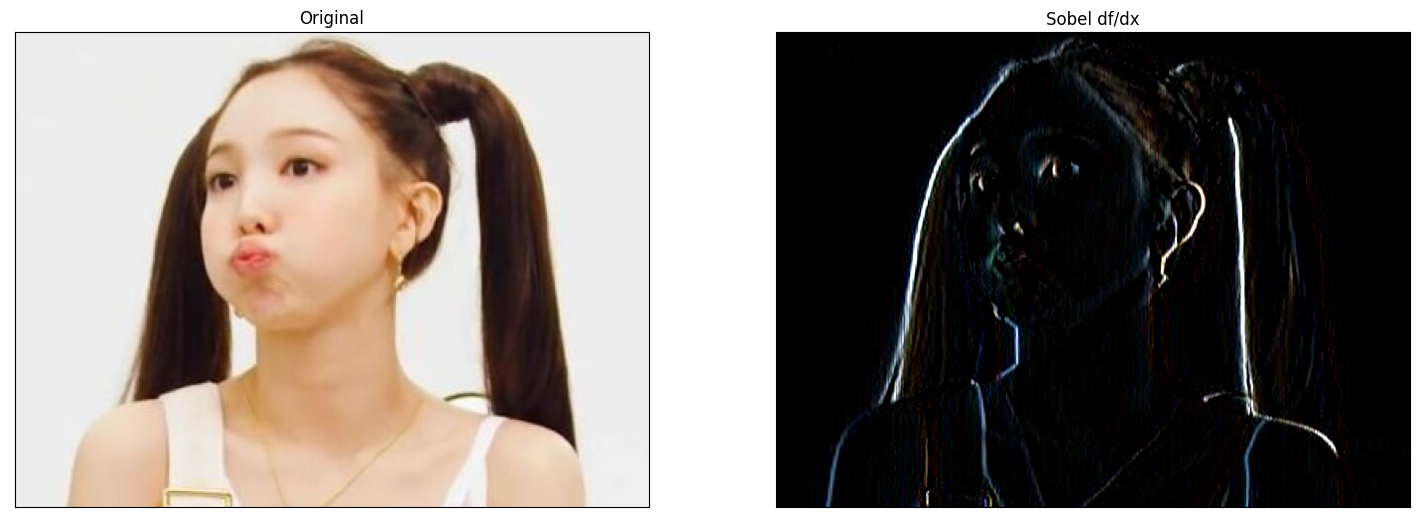

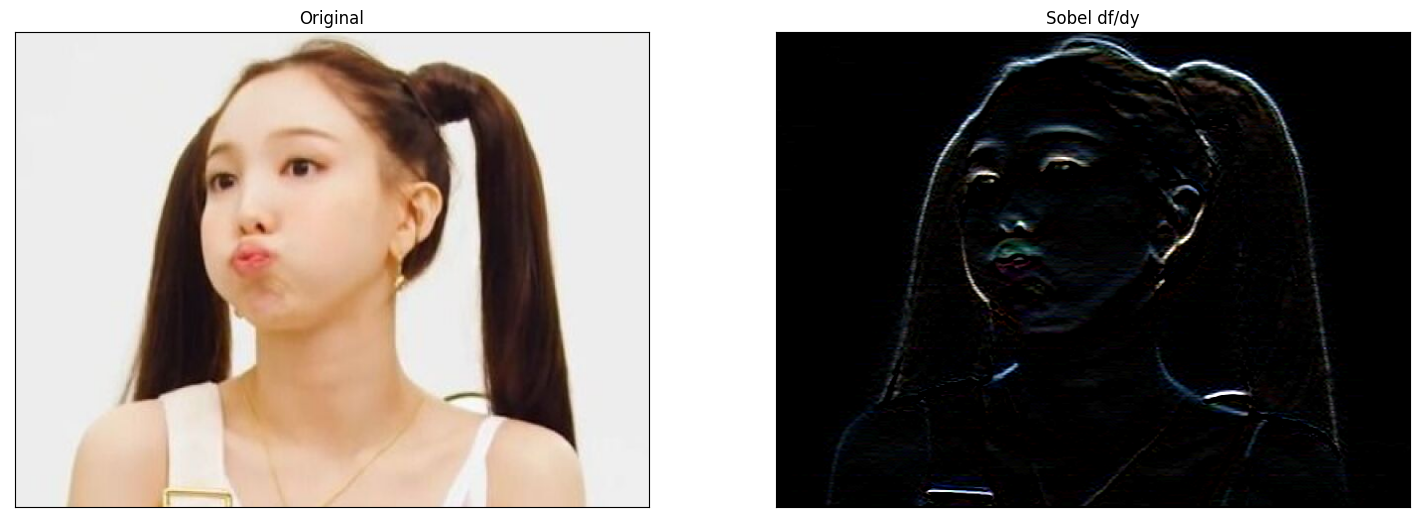

In [219]:
img = cv2.imread('nayeon.jpg')
#edges = cv.Canny(img,150,200)#pesquisar filtro

gaussMatrix(3, img)
sobelMatrix(img)